### Step 1: Pseudocode
[LaTeX pseudo located here](https://github.com/NeuroDataDesign/orange-panda/blob/master/notes/bad_chan_detect/baddetec/bad-electrode-detection.pdf). ["English" pseudo located here (this is before I knew how to use LaTeX](https://github.com/NeuroDataDesign/orange-panda/blob/master/notes/bad_chan_detect/baddetec/pseudo.md)


Also, will need for implementation of kernel probability density funcitons:
[KDE Python Notebook (code.md approved)](https://github.com/NeuroDataDesign/orange-panda/blob/master/notes/bad_chan_detect/Kernel%20Density%20Estimates.ipynb)

As of 11/26/2016:

Adding [Kurtosis Python Notebook](notebooks/orange-panda/notes/bad_chan_detect/Kurtosis.ipynb) as well as Spectral Analysis

Both pseudocodes can be found in the updated LaTeX in the file above.

***

### Step 2: Simulations & Details of Their Parameters

**For all sine waves created:** make sure number of points = 1000 sampled from each wave representing data.

***Success:***
- 50 sine waves, all 50 the same wave
    - Should result in none selected
- 50 sine waves, all 50 the same wave, 1 with lots of white noise
    - Should result in white noise one selected
- 50 sine waves, all same frequency but different amplitudes, 1 with white noise
    - Should result in white noise one selected

***Hopeful:***
- 40 sine waves, 32 with slight noise, 8 with heavy noise **CLOSEST TO REAL DATA**

***Fail:***
- 50 sine waves, all same frequency but different amplitudes, 40 with white noise
    - No idea result; either none selected or multiple



***

### Step 3: Choose Visualization
1. Will use connected scatter plots to show the simulated data (sine waves).
2. Then, after finding the joint probabilities across each of the sine waves (i.e. the electrode), will plot the joint probabilities as a distribution via KDE
3. Finally, comparing the number of standard of deviations from the mean to a threshold, find out if data remains or not. Print which waves stayed, and plot them (not sure if really necessary though).


***

### Step 4: Choose Metrics for Evaluating Performance
Basically if we're able to select the poor waves or not and the final dataset does not have the really poor waves.

***

### Step 5: Generating Simulated Data
Start by generating each set of data from above.

In [67]:
import numpy as np
# Fix random seed
initseed = 123456789
np.random.seed(initseed)

In [180]:
numvals = 1000
# First, build the relevant linspace to grab 1000 points
times = np.linspace(0, 1, numvals)
# Then define the general sine wave used throughout
sin = np.sin(2 * np.pi * times)
# Define function for white noise
def gen_whitenoise(mean, std, size):
    retval = np.random.normal(mean, std, size=size)
    return retval

In [181]:
# Success Case 1 Data
# 50 of the same sine waves
success1 = np.column_stack([sin] * 50)
#print success1.shape

In [182]:
# Success Case 2 Data
# 50 same sine waves, 1 with white noise
success2 = np.column_stack([sin] * 50)
wn = gen_whitenoise(0, 10, numvals)
success2[:, 4] = success2[:, 4] + wn.T
#print success2[0]

In [183]:
# Success Case 3 Data
# 50 different amplitude sine waves, 1 with white noise
success3 = np.column_stack([sin] * 10 +
                           [sin * 2] * 10 +
                           [sin * 3] * 10 +
                           [sin * 4] * 10 +
                           [sin * 5] * 10)
success3[:, 49] = success3[:, 49] + wn.T
#print success3[0]
#print success3[1]

In [184]:
# Hopeful Case 1 Data
# 40 sine waves, 32 each with small amounts of white noise, 8 with a lot
hope1 = np.column_stack([sin] * 40)
for i in range(0, 32):
    hope1[:, i] += gen_whitenoise(0, 0.25, numvals)
for i in range (32, 40):
    hope1[:, i] += gen_whitenoise(0, 20, numvals)
    
#print hope1[:, 0]

In [185]:
# Hopeful Case 2 Data
# 40 sine waves, 32 each with small amounts of white noise, 8 with a lot
hope2 = np.column_stack([sin] * 40)
for i in range(0, 32):
    hope2[:, i] += gen_whitenoise(0, 0.25, numvals)
for i in range (32, 40):
    hope2[:, i] += gen_whitenoise(0, 10, numvals)
    
#print hope1[:, 0]

In [186]:
# Hopeful Case 3 Data
# 40 sine waves, 32 each with small amounts of white noise, 8 with a lot
hope3 = np.column_stack([sin] * 40)
for i in range(0, 32):
    hope3[:, i] += gen_whitenoise(0, 0.25, numvals)
for i in range (32, 40):
    hope3[:, i] += gen_whitenoise(0, 5, numvals)
    
#print hope1[:, 0]

In [187]:
# Fail Case 1 Data
# 50 same sine waves, 40 with white noise
fail1 = np.column_stack([sin] * 50)
for i in range(0, 40):
    fail1[:, i] = fail1[:, i] + gen_whitenoise(0, 2, numvals)
    
#print fail1[0]

***
### Step 6: Plot Simulated Data

In [188]:
from plotly import __version__
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
#init_notebook_mode()
from plotly.plotly import iplot
import plotly
plotly.tools.set_credentials_file(username='nkumarcc', api_key='4RN5JVpxY9sjxPyniLim')
#init_notebook_mode()

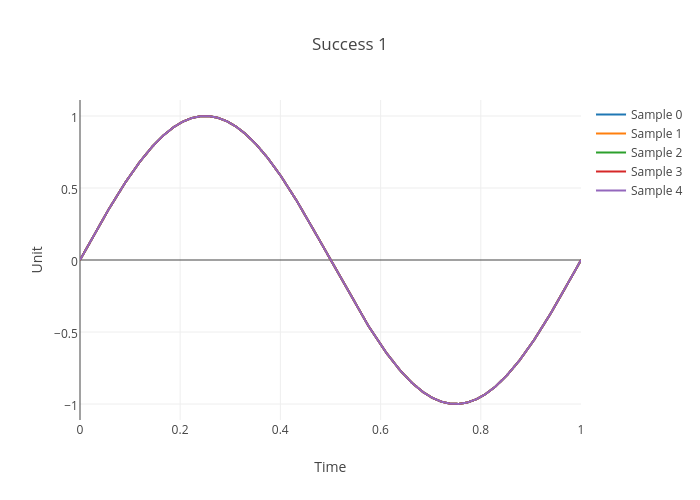

In [190]:
# Success 1

# Setup plotly data
datasets = []
for i in range(0, 5):
    datasets.append(Scatter(
        x = times,
        y = success1[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Success 1',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

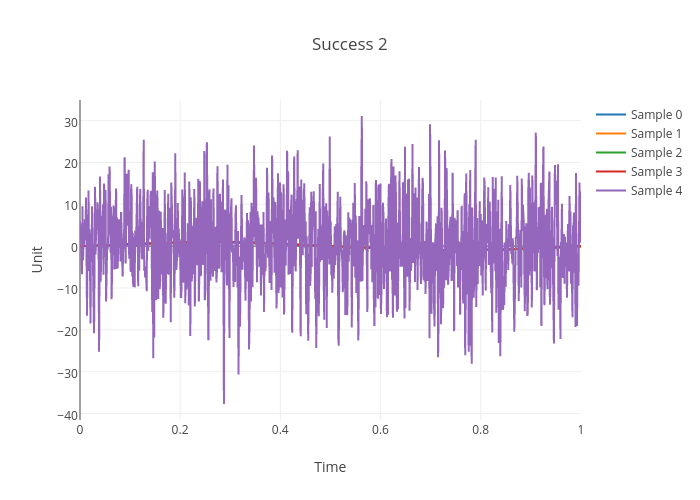

In [191]:
# Success 2

# Setup plotly data
datasets =[]

for i in range(0, 5):
    datasets.append(Scatter(
        x = times,
        y = success2[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Success 2',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

C:\Users\Nitin\Anaconda2\lib\site-packages\plotly\plotly\plotly.py:690: UserWarning:

Estimated Draw Time Slow



The draw time for this plot will be slow for clients without much RAM.


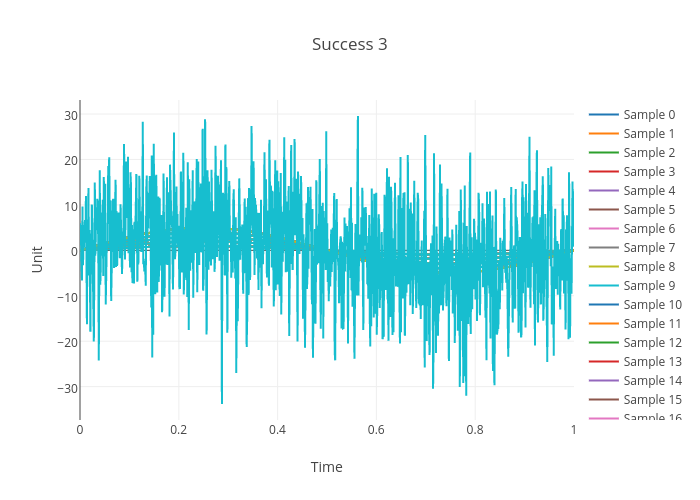

In [192]:
# Success 3

# Setup plotly data
datasets =[]

for i in range(0, success3.shape[1]):
    datasets.append(Scatter(
        x = times,
        y = success3[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Success 3',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

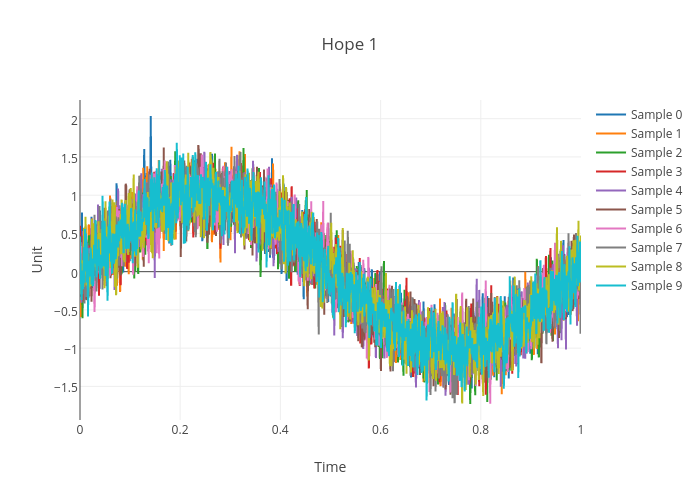

In [193]:
# Hopeful 1

# Setup plotly data
datasets =[]

for i in range(0, 10):
    datasets.append(Scatter(
        x = times,
        y = hope1[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Hope 1',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

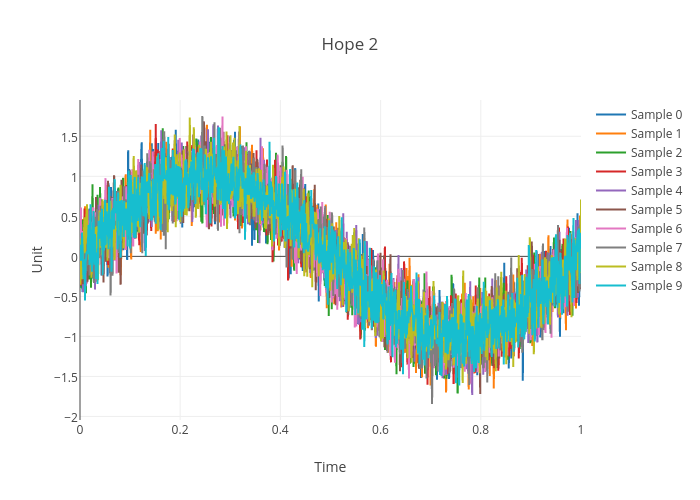

In [194]:
# Hopeful 2

# Setup plotly data
datasets =[]

for i in range(0, 10):
    datasets.append(Scatter(
        x = times,
        y = hope2[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Hope 2',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

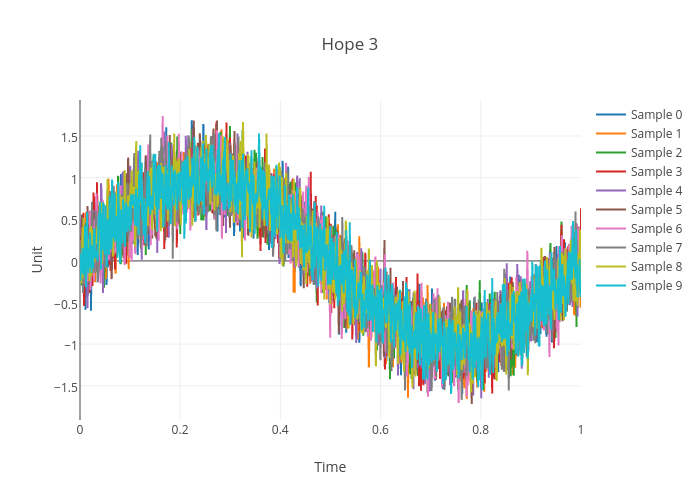

In [195]:
# Hopeful 3

# Setup plotly data
datasets =[]

for i in range(0, 10):
    datasets.append(Scatter(
        x = times,
        y = hope3[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Hope 3',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

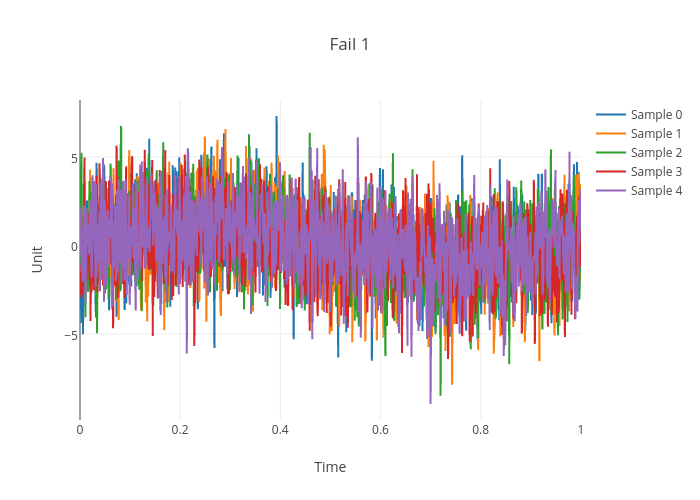

In [196]:
# Fail 1

# Setup plotly data
datasets =[]

for i in range(0, 5):
    datasets.append(Scatter(
        x = times,
        y = fail1[:,i],
        name = 'Sample ' + str(i)
    ))

data = [datasets[:]]

# Setup layout

layout = dict(title = 'Fail 1',
              xaxis = dict(title = 'Time'),
              yaxis = dict(title = 'Unit'),
              )

# Make figure object

fig = dict(data=datasets, layout=layout)

iplot(fig)

***

### Step 7: Write Algorithm Code

**Go step by step.**

**Reshape Data!**

In [197]:
# Reshape Data: Run with no reshaping

electrodes = 0
trials = 0
times = 0

print len(success1.shape)

def reshape(inEEG):
    if len(inEEG.shape) == 3:
        electrodes = inEEG.shape[1]
        times = inEEG.shape[0]
        trials = inEEG.shape[2]
        return np.reshape(inEEG, (inEEG.shape[0] * inEEG.shape[2], inEEG.shape[1]))
    elif len(inEEG.shape) != 1 and len(inEEG.shape) != 2:
        # fail case
        print "fail"
    else:
        return inEEG
    
print "Final dimensions:", reshape(success1).shape

2
Final dimensions: (1000L, 50L)


In [198]:
# Reshape Data: Run with reshaping

success1 = np.expand_dims(success1, 2)
print len(success1.shape)
print success1.shape
print "Final dimensions:", reshape(success1).shape
success1 = reshape(success1)

3
(1000L, 50L, 1L)
Final dimensions: (1000L, 50L)


In [199]:
# Reshape Data: run with data where reshaping actually matters
dummy = np.dstack([success1] * 2)
print dummy.shape
print dummy[:,:,1].shape
print "Final dimensions:", reshape(dummy).shape

(1000L, 50L, 2L)
(1000L, 50L)
Final dimensions: (2000L, 50L)


**Kernel density probability dist**

In [200]:
# Now define the probability density functions tested in other notebooks
from sklearn.neighbors.kde import KernelDensity
from sklearn.grid_search import GridSearchCV
# Run the KDE!
def kdewrap(indata, kernel):
    grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=10) # 10-fold cross-validation
    grid.fit(indata[:, None])
    kde = KernelDensity(kernel=kernel, bandwidth=grid.best_params_["bandwidth"]).fit(indata[:, np.newaxis])
    return kde.score_samples(indata[:, np.newaxis])

def silverman(data):
    # compute sttddev
    stddev = np.std(data)
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    m = min(iqr/1.349, stddev)
    silv = (0.9 * m)/(len(data) ** .2)
    if silv == 0:
        return 0.5
    return silv

def kdewrap_simp(indata, kernel):
    kde = KernelDensity(kernel=kernel, bandwidth=silverman(indata)).fit(indata[:, np.newaxis])
    return kde.score_samples(indata[:, np.newaxis])

**Define what's inside loop the KDE will execute in**

In [201]:
regelec = success1[:, 0]
#print regelec
probdist = kdewrap(regelec, 'gaussian')
#print probdist
# get joint prob with assumption in log-likelihood format
# leave in log-likelihood to prevent underflow
jointprob = np.sum(probdist)
print jointprob

-888.71409723


**These are really all the modular testable parts of the code. Now will combine into algorithm + ending section**
### Algorithm Definition:

#### Probability Bad Electrode Detection

In [202]:
def prob_baddetec(inEEG, threshold, probfunc):
    electrodes = inEEG.shape[1]
    
    # Start by reshaping data (if necessary)
    if len(inEEG.shape) == 3:
        inEEG = np.reshape(inEEG, (inEEG.shape[0] * inEEG.shape[2], inEEG.shape[1]))
    elif len(inEEG.shape) != 1 and len(inEEG.shape) != 2:
        # fail case
        return -1
    
    # Then, initialize a probability vector of electrode length
    probvec = np.zeros(electrodes)
    
    # iterate through electrodes and get joint probs
    for i in range(0, electrodes):
        print i
        # get prob distribution
        probdist = probfunc(inEEG[:, i], 'gaussian')
        # using probdist find joint prob
        probvec[i] = np.sum(probdist)
    
    # normalize probvec
    # first calc mean
    avg = np.mean(probvec)
    # then st, d dev
    stddev = np.std(probvec)
    # then figure out which electrodes are bad
    badelec = []
    #print probvec
    for i in range(0, len(probvec)):
        #print i, avg, stddev, (avg - probvec[i]) / stddev
        if abs((avg - probvec[i]) / stddev) >= threshold:
            badelec.append(i)
            
    return badelec

#### Kurtosis Bad Electrode Detection:

In [203]:
from scipy.stats import kurtosis

In [204]:
def kurt_baddetec(inEEG, threshold):
    electrodes = inEEG.shape[1]
    
    # Start by reshaping data (if necessary)
    if len(inEEG.shape) == 3:
        inEEG = np.reshape(inEEG, (inEEG.shape[0] * inEEG.shape[2], inEEG.shape[1]))
    elif len(inEEG.shape) != 1 and len(inEEG.shape) != 2:
        # fail case
        return -1
    
    # Then, initialize a probability vector of electrode length
    kurtvec = np.zeros(electrodes)
    
    # iterate through electrodes and get kurtoses
    for i in range(0, electrodes):
        # add kurtosis to the vector
        kurtvec[i] = kurtosis(inEEG[:, i])
        #print kurtvec[i]
        
    
    # normalize kurtvec
    # first calc mean
    avg = np.mean(kurtvec)
    # then std dev
    stddev = np.std(kurtvec)
    # then figure out which electrodes are bad
    badelec = []
    #print probvec
    for i in range(0, len(kurtvec)):
        #print i, avg, stddev, (avg - kurtvec[i]) / stddev
        if abs((avg - kurtvec[i]) / stddev) >= threshold:
            badelec.append(i)
            
    return badelec

#### Spectral Bad Electrode Detection:

In [205]:
def spec_baddetec(inEEG, posthresh, negthresh):
    electrodes = inEEG.shape[1]
    
    # Start by reshaping data (if necessary)
    if len(inEEG.shape) == 3:
        inEEG = np.reshape(inEEG, (inEEG.shape[0] * inEEG.shape[2], inEEG.shape[1]))
    elif len(inEEG.shape) != 1 and len(inEEG.shape) != 2:
        # fail case
        return -1
    
    # initialize badelec as an empty array
    badelec = []
    
    # iterate through electrodes and get spectral densities
    for i in range(0, electrodes):
        # get frequency spectrum for electrode
        sp = np.fft.fft(inEEG[:, i]).real
        sp = sp - np.mean(sp)
        for power in sp:
            if power > posthresh or power < negthresh:
                badelec.append(i)
                break
        
    return badelec

In [206]:
def good_elec(inEEG, badelec):
    return np.delete(inEEG, badelec, 1)

***

### Step 8: Write Qualitative Evaluation Code
Simply replot signals minus the bad electrodes.

In [207]:
def qual_eval(badelec, expected):
    print "Expected:", expected
    print "Actual:", badelec

def qual_plot(data, title):
    # Setup plotly data
    datasets =[]
    for i in range(0, data.shape[1]):
        datasets.append(Scatter(
            x = times,
            y = data[:,i],
            name = 'Sample ' + str(i)
        ))

    data = [datasets[:]]

    # Setup layout

    layout = dict(title = title,
                  xaxis = dict(title = 'Time'),
                  yaxis = dict(title = 'Unit'),
                  )

    # Make figure object

    fig = dict(data=datasets, layout=layout)

    iplot(fig)

***
### Step 9: Write Quantitative Evaluation Code
Just check the correct number of bad electrodes were removed and which ones were removed

In [208]:
def quant_eval(badelec, expected):
    if set(x) == set(y):
        return true
    else:
        return false


***
### Step 10: Run Qualitative Code

In [209]:
#dummybad_prob = prob_baddetec(success3, 3, kdewrap)
#dummybad_kurt = kurt_baddetec(success3, 3)
#dummybad_spec = spec_baddetec(success3, 10, -50)

In [210]:
#print dummybad_prob
#print dummybad_kurt
#print dummybad_spec

In [114]:
# First run on all datasets
#s1probbad = prob_baddetec(success1, 3, kdewrap)
#s2probbad = prob_baddetec(success2, 3, kdewrap)
#s3probbad = prob_baddetec(success3, 3, kdewrap)
h1probbad = prob_baddetec(hope1, 3, kdewrap)
h2probbad = prob_baddetec(hope2, 3, kdewrap)
h3probbad = prob_baddetec(hope3, 3, kdewrap)
#f1probbad = prob_baddetec(fail1, 3, kdewrap)

In [79]:
s1bad = set(s1probbad)
s1kurtbad = kurt_baddetec(success1, 3)
s1bad.update(s1kurtbad)
s1specbad = spec_baddetec(success1, 50, -50)
s1bad.update(s1specbad)
print s1probbad
print s1kurtbad
print s1specbad
print s1bad

-1.4984984985 2.22044604925e-16
[]
[]
[]
set([])


In [80]:
s2bad = set(s2probbad)
s2kurtbad = kurt_baddetec(success2, 3)
s2bad.update(s2kurtbad)
s2specbad = spec_baddetec(success2, 50, -50)
s2bad.update(s2specbad)
print s2probbad
print s2kurtbad
print s2specbad
print s2bad

-1.46390311088 0.242167713305
[4]
[4]
[4]
set([4])


In [81]:
s3bad = set(s3probbad)
s3kurtbad = kurt_baddetec(success3, 3)
s3bad.update(s3kurtbad)
s3specbad = spec_baddetec(success3, 50, -50)
s3bad.update(s3specbad)
print s2probbad
print s2kurtbad
print s2specbad
print s2bad

-1.4656359684 0.230037710706
[4]
[4]
[4]
set([4])


In [89]:
h1bad = set(h1pobbad)
h1kurtbad = kurt_baddetec(hope1, 3)
h1bad.update(h1kurtbad)
h1specbad = spec_baddetec(hope1, 50, -50)
h1bad.update(h1specbad)
print h1pobbad
print h1kurtbad
print h1specbad
print h1bad

-0.950856363075 0.4706078272
[]
[]
[32, 33, 34, 35, 36, 37, 38, 39]
set([32, 33, 34, 35, 36, 37, 38, 39])


In [96]:
#h1prob13 = prob_baddetec(hope1, 1.5, kdewrap)
#h1prob4 = prob_baddetec(hope1, 2, kdewrap)
#h1prob1 = prob_baddetec(hope1, 2.5, kdewrap)
#h1prob0 = prob_baddetec(hope1, 3, kdewrap)
print "13 percent rejected", h1prob13
print "4 percent rejected", h1prob4
print "1 percent rejected", h1prob1
print ".27 percent rejected", h1prob0

13 percent rejected [32, 33, 34, 35, 36, 37, 38, 39]
4 percent rejected [32, 33, 37, 38]
1 percent rejected []
.27 percent rejected []


In [98]:
h1kurt13 = kurt_baddetec(hope1, 1.5)
h1kurt4 = kurt_baddetec(hope1, 2)
h1kurt1 = kurt_baddetec(hope1, 2.5)
h1kurt0 = kurt_baddetec(hope1, 3)
print "13 percent rejected", h1kurt13
print "4 percent rejected", h1kurt4
print "1 percent rejected", h1kurt1
print ".27 percent rejected", h1kurt0

13 percent rejected [32, 33, 34, 35, 36, 37, 38, 39]
4 percent rejected [33, 37, 38, 39]
1 percent rejected []
.27 percent rejected []


In [100]:
f1bad = set(f1probbad)
f1kurtbad = kurt_baddetec(fail1, 3)
f1bad.update(f1kurtbad)
f1specbad = spec_baddetec(fail1, 50, -50)
f1bad.update(f1specbad)
print f1probbad
print f1kurtbad
print f1specbad
print f1bad

[]
[]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])


In [101]:
f1prob13 = prob_baddetec(fail1, 1.5, kdewrap)
f1prob4 = prob_baddetec(fail1, 2, kdewrap)
f1prob1 = prob_baddetec(fail1, 2.5, kdewrap)
f1prob0 = prob_baddetec(fail1, 3, kdewrap)
print "13 percent rejected", f1prob13
print "4 percent rejected", f1prob4
print "1 percent rejected", f1prob1
print ".27 percent rejected", f1prob0

13 percent rejected []
4 percent rejected []
1 percent rejected []
.27 percent rejected []


In [93]:
f1kurt13 = kurt_baddetec(fail1, 1.5)
f1kurt4 = kurt_baddetec(fail1, 2)
f1kurt1 = kurt_baddetec(fail1, 2.5)
f1kurt0 = kurt_baddetec(fail1, 3)
print "13 percent rejected", f1kurt13
print "4 percent rejected", f1kurt4
print "1 percent rejected", f1kurt1
print ".27 percent rejected", f1kurt0

-0.31638733195 0.606207822786
-0.31638733195 0.606207822786
-0.31638733195 0.606207822786
-0.31638733195 0.606207822786
13 percent rejected [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
4 percent rejected []
1 percent rejected []
.27 percent rejected []


In [212]:
qual_eval(list(s1bad), [])
qual_plot(good_elec(success1, list(s1bad)), "Success 1")

Expected: []
Actual: []
The draw time for this plot will be slow for clients without much RAM.


In [40]:
qual_eval(list(s2bad), [4])
qual_plot(good_elec(success2, list(s2bad)), "Success 2")

Expected: [4]
Actual: [4]


In [41]:
qual_eval(list(s3bad), [49])
qual_plot(good_elec(success3, list(s3bad)), "Success 3")

Expected: [49]
Actual: [49]


In [65]:
# just with prob baddetec 2.5 [32, 33, 37, 38]
qual_eval(list(h1bad), range(32,40))
qual_plot(good_elec(hope1, list(h1bad)), "Hope 1")

Expected: [32, 33, 34, 35, 36, 37, 38, 39]
Actual: [32, 33, 34, 35, 36, 37, 38, 39]


In [66]:
qual_eval(list(f1bad), [])
qual_plot(good_elec(fail1, list(f1bad)), "Fail 1")

Expected: []
Actual: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


***
### Step 11: Run Quantitative Code

Ran quantitative in line with simulations up above

***
### Step 12: Anlayzing Evaluations

Unfortunately, what I expected to happen didn't exactly happen. At 3 standard deviations away (which is a standard lent by what the researchers used in their own probability implementation), none of the noisy data was there. Attempting to modify the noise inputted into the data by changing the scale of which the noise was being added (ie changing stddev from 1 -> 2 -> 3) had literally no effect on the outcome. What makes sense is that maybe because the number of white noise values being used is so high, they accurately depict a normal graph, and if they depict a normal graph, the distribution that is eventually modelled by the kernel probability is essentially a normal graph. Not sure best way to deal with this problem (or should I fix simulations?) but will ask Jovo for help before moving more

***
***

## Real Data Utility

#### Use our given EEG data

In [98]:
import os
import h5py
os.chdir('C:/Users/Nitin/Documents/Hopkins/BCI/datashare')
#print os.getcwd()
# get the data
D = h5py.File("full_A00051826_01.mat", 'r')
data = D["result"]["data"][:, :]
# Get detected bad channels
badchans = D["result"]["auto_badchans"][:]
# Append electrodes with dead signals
badchans = np.append(badchans, [0, 7, 13, 19, 23]).tolist()
badchans = [int(i) for i in badchans]
badchans.sort()
print badchans

[0, 7, 13, 19, 23, 48, 54, 56, 57, 64, 83, 97, 105, 111]


#### Use our implementation of discriminability

In [54]:
def partial_disc(eeg_data, s_p, t, t_p, delta):
    T = eeg_data.shape[1] # Number of trials = number of electrodes
    S = eeg_data.shape[2] # Number of subjects = number of patients
    total_true = 0
    for s in range(S):
        if not (s == s_p):
            for t_pp in range(T):
                intra = delta(eeg_data[:, t, s], eeg_data[:, t_p, s])
                inter = delta(eeg_data[:, t, s], eeg_data[:, t_pp, s_p])
                #print intra, inter
                total_true += int(intra < inter)
    #print total_true
    return float(total_true) / ((S-1) * T)

def disc(eeg_data, delta):
    T = eeg_data.shape[1] # Number of trials = no. of electrodes
    S = eeg_data.shape[2] # Number of subjects = no of patients
    tot = 0
    for s in range(S):
        for t in range(T):
            #print t
            for t_p in range(T):
                if not (t_p == t):
                    tot += partial_disc(eeg_data, s, t, t_p, delta)
    return float(tot) / ((T - 1) * T * S)

In [55]:
def delta(arr1, arr2):
    if np.corrcoef(arr1[:], arr2[:])[0,1] > 0.5:
        return 0
    return 1

#### Now, based off the original patients datasets, generate different combinations of the electrodes to generate "different" patients. Will downsample and grab subsets of electrodes.

In [100]:
print data.shape
patient0 = data[:20000, :50]
patient0_badchans = [i for i in badchans if i < 50]
# patient 0 has all 5 0'ed channels and 1 bad chan
print patient0.shape
print patient0_badchans
patient1 = data[:20000, 25:75]
patient1_badchans = [(i - 25) for i in badchans if i < 75 and i > 25]
# patient 1 has no 0'ed channels and 5 badchans
print patient1.shape
print patient1_badchans
# make joint data array
sample = np.concatenate((np.expand_dims(patient0, 3)
                         , np.expand_dims(patient1, 3)), axis = 2)
print sample.shape[1]


patient2 = data[:5000, :10]
patient2_badchans = [i for i in badchans if i < 20]
# patient 0 has all 5 0'ed channels and 1 bad chan
print patient2.shape
print patient2_badchans
patient3 = data[:5000, 10:20]
patient3_badchans = [(i - 20) for i in badchans if i < 40 and i >= 20]
# patient 1 has no 0'ed channels and 5 badchans
print patient3.shape
print patient3_badchans
sample3 = np.concatenate((np.expand_dims(patient2, 3),
                          np.expand_dims(patient3, 3)), axis = 2)
print sample2.shape



(209026L, 111L)
(20000L, 50L)
[0, 7, 13, 19, 23, 48]
(20000L, 50L)
[23, 29, 31, 32, 39]
50
(5000L, 10L)
[0, 7, 13, 19]
(5000L, 10L)
[3]
(5000L, 20L, 2L)


#### Get discriminability of the data

In [57]:
samp2disc = disc(sample2, delta)
samp3disc = disc(sample3, delta)

In [58]:
print samp2disc
print samp3disc

0.174802631579
0.14


In [59]:
sampdisc = disc(sample, delta)

In [60]:
print sampdisc

0.285024489796


**With the discriminability known, run prob based bad_detec on it (std dev of 1.5 and 2,1.5 for starters) and see how many electrodes get detected**

In [89]:
bad_elec = prob_baddetec(patient0, 1.5, kdewrap_simp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [103]:
result0 = bad_elec
print result0
print patient0_badchans

[0, 7, 13, 19, 23, 30]
[0, 7, 13, 19, 23, 48]


**We can already see here that the 0 electrodes were caught; the actual bad electrode however was not, meanwhile an electrode that was actually not bad was caught. This is not good news.**

In [104]:
good0 = good_elec(patient0, bad_elec)

**Now will run on patient 1**

In [105]:
result1 = prob_baddetec(patient1, 1.5, kdewrap_simp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [106]:
print result1
print patient1_badchans

[5, 25, 26, 47]
[23, 29, 31, 32, 39]


In [110]:
good1 = good_elec(patient1, result1)

**While on one hand, we have seen a loss of electrodes that were not detected as bad by the actual datasets, let's see if we at least boosted discriminability**

In [115]:
print good0.shape
print good1.shape
# shapes are different, so will drop 2 good 1 electrodes
good1_sub = good1[:, :-2]
print good1_sub.shape

(20000L, 44L)
(20000L, 46L)
(20000L, 44L)


In [116]:
resultsamp = np.concatenate((np.expand_dims(good0, 3),
                np.expand_dims(good1_sub, 3)), axis = 2)

In [117]:
result_disc = disc(resultsamp, delta)

In [118]:
print result_disc

0.315767345762


**Marginal improvement! Now we need to understand why we're getting different results than the other one**

In [133]:
kurt0 = kurt_baddetec(patient0, 2)
print kurt0
print patient0_badchans
goodkurt0 = good_elec(patient0, kurt0)
kurt1 = kurt_baddetec(patient1, 2)
print kurt1
print patient1_badchans
goodkurt1 = good_elec(patient1, kurt1)
print goodkurt0.shape
print goodkurt1.shape
goodkurt1_sub = goodkurt1[:, :-3]

[0, 7, 13, 19, 23, 30]
[0, 7, 13, 19, 23, 48]
[4, 5, 26]
[23, 29, 31, 32, 39]
(20000L, 44L)
(20000L, 47L)


In [134]:
resultskurt = np.concatenate((np.expand_dims(goodkurt0, 3),
                np.expand_dims(goodkurt1_sub, 3)), axis = 2)

In [135]:
kurt_disc = disc(resultskurt, delta)

In [136]:
print kurt_disc

0.316668268307


**Marginal improvement! Still, why are we getting different results from the actual data?**

In [214]:
qual_plot(goodkurt0, "Swag")

The draw time for this plot will be slow for all clients.
